# Lesson - Machine Learning VI:Calculus for Machine Learning


## Sec-1 - Linear and Non Linear Functions

Earlier, we explored the machine learning workflow using the k-nearest neighbors algorithm. We chose the k-nearest neighbors algorithm because building the intuition for how the algorithm works doesn't require any mathematics. While the algorithm is easy to grasp, we can't use it for larger datasets because the model itself is represented using the entire training set. Each time we want to make a prediction on a new observation, we need to calculate the distance between each observation in our training set and our new observation, then rank by ascending distance. This is a computationally intensive technique.

For most of the machine learning techniques, the model is represented as a mathematical function. This mathematical function approximates the underlying function that describes how the features are related to the target attribute. Once we derive this mathematical function using the training dataset, making predictions on the test dataset (or on a future dataset) is computationally cheap. The following diagram shows 2 different linear regression functions that approximate the dataset (note that the values in this dataset are random).

![image.png](attachment:image.png)

Calculus provides a framework for understanding how mathematical functions behave. Calculus helps us:

- understand the steepness at various points
- find the extreme points in a function
- determine the optimal function that best represents a dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

### Linear Function

A simple, straight line is more clearly defined as a linear function. All linear functions can be written in the following form:

$$y = mx + b$$

For a specific linear function, m and b are constant values while x and y are variables. y=3x+1 and y=5 are both examples of linear function.

Let's focus on the function y=3x+1 for now. This function multiples any x value we pass in by 3 then adds 1 to it.

The constant m determines how steep the line is. When m is equal to 0, the line is completely flat and is parallel to the x-axis. When m and b are both set to 0, the line is equivalent to the x-axis. 

The m value controls a line's slope while the b value controls a line's y-intercept. The y-intercept is the value where the line intersects the y-axis. When we fix m but vary b, the point at which the line intersected the y-axis varies. The line intersects the y-axis when x is 0. For y=3x+1, the y-intercept is 1:
$$f(0) = 3(0) + 1 = 1$$

While the y-intercept describes where a line intersects the y-axis, the slope describes the steepness of the line. Whenever we set m to a positive value, the y values increase as the x values increase. Whenever we set m to a negative value, the y values decrease as the x values increase. When m was 0, the y value was consistent throughout (and equivalent to the y-intercept).

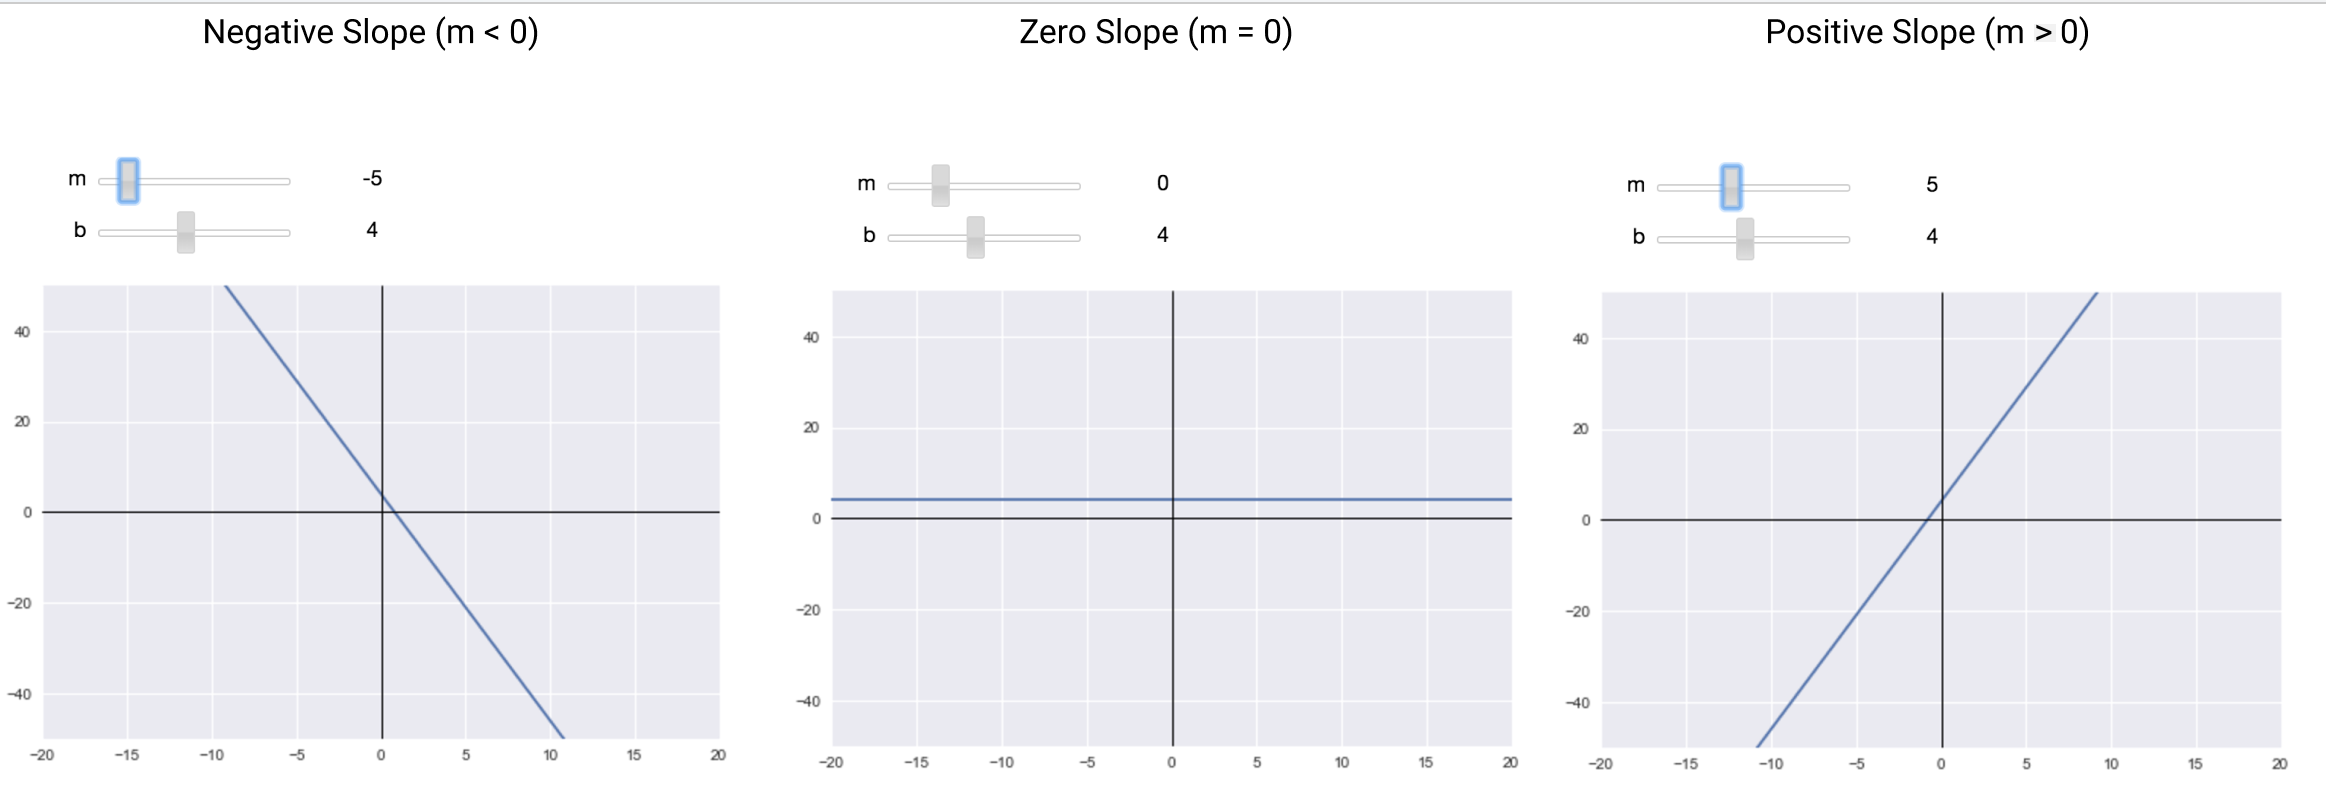

Another way to think about slope is **rate of change**. The rate of change is how much the y axis changes for a specific change in the x axis.

$$m = \frac {\text {change in y}} {\text{change in x}}  = \frac{\Delta y}{ \Delta x}$$

Following is the slope calculation between the points (1,4) and (4,13), which are both points on the line y=3x+1:
$$m = \frac {\text {change in y}} {\text{change in x}}  = \frac {\text {13 - 4}} {\text{4 - 1}} = 3$$

When referring to unique x and y coordinates, an integer value is usually added to the subscripts. For example, the points (1,4) and (4,13) from the last calculation can be referred to as (x1,y1) and (x2,y2). If we don't specify what (x1,y1) and (x2,y2) are, they act as variables.

### Slope

If we calculate the rate of change between any points on a line, it will always equal the function's slope. Let's show this for the more general case. In the following math block, (x1,y1) and (x2,y2) represent any 2 coordinates on a line:
$$y_1 = mx_1 + b$$
$$y_2 = mx_2 + b$$

We can subtract both of these equations to get:
$$y_1 - y_2 = mx_1 - mx_2 + b - b$$
$$y_1 - y_2 = m(x_1 - x_2)$$
$$m = (y_1 - y_2)/(x_1 - x_2)$$

where y1−y2 represents Δy, and x1−x2 represents Δx. 

Below, we will write a function for calculating slope of a line.

In [2]:
def slope(x1, x2, y1, y2):
    slope = (y2-y1) / (x2-x1)
    return slope

slope_one = slope(0,4,1,13)
slope_two = slope(5,-1,16,-2)
print(slope_one, slope_two)


3.0 3.0


### Non Linear Function

Suppose, following equation, which describes the trajectory of a ball after it's kicked by a football player:

$$y = -(x^2) + 3x - 1$$

x is time in seconds while y is the vertical position of the ball. Naturally, we'd like to know the highest position the ball reached and at what time that happened. While we can graph the equation and estimate the result visually, if we want the precise time and vertical position we'll need to use calculus.

If we analyze the above equation, we'll notice that it doesn't match the form y=mx+b. This is because this function is a nonlinear function. Nonlinear functions don't represent straight lines -- they represent curves. The outputs y of a nonlinear function are not proportional to the input values x. An increment in x doesn't result in a constant increment in y.

**Whenever x is raised to a power not equal to 1, we have a non-linear function**. Here are some more examples of nonlinear functions:

$$y=x3$$
$$y = x^3 + 3x^2 + 2x - 1$$
$$y = \frac{1} {-x^2}$$
$$y = \sqrt x$$



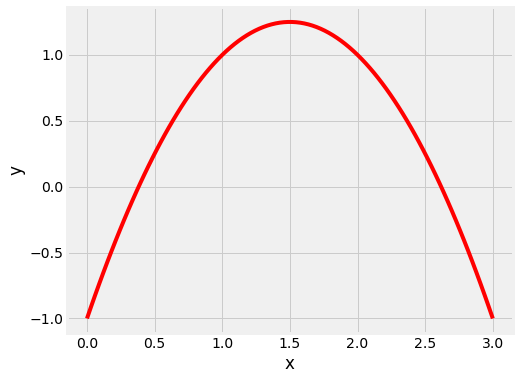

In [3]:
x = np.linspace(start = 0, stop= 3, num = 100, endpoint = True )
y = -1* (x**2) + 3*x - 1

fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.plot(x, y, color = 'red')
plt.xlabel("x") # k is the order of listing not k value
plt.ylabel('y')
plt.show()

### Secant Lines

When we calculate the slope between 2 points on a curve, we're really calculating the slope between the line that intersects both of those points. The equation for a linear function is y=mx+b. If we know the values for m, x, and y, we can calculate b, the y-intercept. For example for the following function if x1 = 0 and x2 = 1:
$$y = -(x^2) + 3x - 1$$
$$x_1 = 0$$
$$x_2 = 1$$
We use y=−(x2)+3x−1 to calculate y1 and y2 which come out to be y1= -1 and y2 = 1 and the slope m = (y2-y1)/ (x2-x1) = 2 and:
$$y_1 = mx_1 + b$$
$$-1 = 2(0) + b$$
b = -1

Finally, we can use the slope and the y-intercept to declare the equation for the line connecting both points:
$$y = 2x - 1$$

A line that intersects 2 points on a curve is known as a **secant line**. 

**Exercise**

Writ the function draw_secant() for the above nonlinear function between the x-values -20 and 30.

In [4]:
import seaborn
seaborn.set(style='darkgrid')

def draw_secant(x_values):
    x = np.linspace(-20,30,100)
    y = -1*(x**2) + x*3 - 1
    plt.plot(x,y)
    y_values = []
    for values in x_values:
        y_func = -1*(values**2) + values*3 - 1
        y_values.append(y_func)
    m = (y_values[1] - y_values[0]) / (x_values[1] - x_values[0])    
    b = y_values[1] - m*x_values[1]
    y_sec_line = m*x + b
    plt.plot(x, y_sec_line, c='green')
    plt.show()

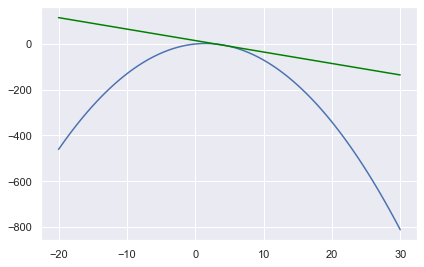

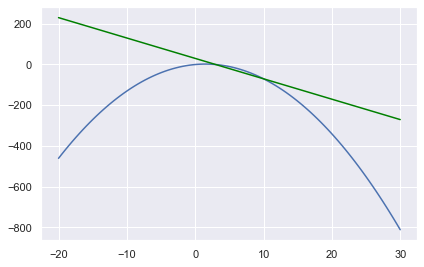

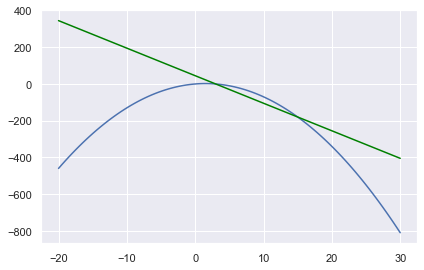

In [5]:
draw_secant([3,5])
draw_secant([3,10])
draw_secant([3,15])


### Secant Line and Slope

Above, we drew secant lines between the fixed x1 value and increasingly larger x2 values. When the gap between x1 and x2 was small, the secant line intersected comfortably with our curve. As we increased the gap between the 2 x-values, the secant line started to diverge from our curve. This observation is critical to understanding how slope works for curves.

The slope of a curve at a specific point, x1 is best understood as the slope of the secant line at increasingly smaller intervals of $[x1,x2]$. The smaller the difference between x1 and x2, the more precise the secant line approximates the slope at that point on our curve.

### Tangent Line

When x1 and x2 are equivalent,the slope value is undefined. This is because division by 0 has no meaning in mathematical calculations.
$$m = \frac{-1 - -1}{3 - 3} = \frac{0}{0} = \hbox{ undefined }$$

As x2 approaches x1 from either side of the curve, however, the slope of the secant line approaches −3. Even though we can't calculate the slope at the point where x0=x1=3, we can tell from calculations that it approaches −3. This value is known as the instantaneous rate of change, because it describes the slope at a particular point. For linear functions, the instantaneous rate of change at any point on the line is the same. For nonlinear functions, the instantaneous rate of change describes the steepness of the graph of the function at a specific point. 

This line is known as the tangent, and, unlike the secant line, it only intersects our function at one point. So far, we've been working with secant lines that connect 2 points that are increasingly close together. We can think of the tangent line as the secant line when both points are the same. 

## Sec-2 - Limits

Above, we observed what happened when we moved the second point closer to the first point along the curve. The larger the interval between the 2 points on the x-axis, the more the steepness of the secant line diverged from the steepness of the curve. The closer the interval, the more the secant line started to match the steepness at the first point on the curve.

Earlier we saw that if  we try to state the observation by plugging in values to the slope equation, we'll run into the division-by-zero problem:

$$m = \frac{f(x_2) - f(x_1)}{x_2 - x_1} = 0 / 0$$

Even though the slope is undefined when x1 and x2 are equivalent, we still want to be able to state and reason about what value the slope approaches as x2 approaches x1. To do that, we need to reframe the problem as a limit. A limit describes the value a function approaches when the input variable to the function approaches a specific value. In our case, the input variable is x2 and our function is $m = \frac{f(x_2) - f(x_1)}{x_2 - x_1}$. The following mathematical notation formalizes the statement "As x2 approaches 3, the slope between x1 and x2 approaches −3" using a limit:

$$\lim_{x_2 \to 3} \frac{f(x_2) - f(x_1)}{x_2 - x_1} = -3$$

$\lim_{x_2 \to 3}$ is another way of saying "As x2 approaches 3". Because we fixed x1 to 3, we can replace x1 with 3 in the function:
$$\lim_{x_2 \to 3} \frac{f(x_2) - f(3)}{x_2 - 3} =  \lim_{x_2 \to 3} \frac{f(x_2) + 1}{x_2 - 3} = -3$$

### Defined versus Undefined Limits

There are 2 kinds of limits -- defined limits and undefined limits. The limit above was an undefined limit because plugging in 3 for x2 results in an undefined value. A defined limit can be evaluated just by substituting the value into the limit.

Following are the slopes of the secant lines between closer and closer points to x1=3:

>
   x1	x0	m
    2.9	3	-2.9
   2.99	3	-2.99
   2.999 3	-2.999
   3.01	3	-3.01
   3.001 3	-3.001
   3.0001 3	-3.0001
   >
   
 To calculate each of these slopes, we plugged in both x1 and x2 values into the slope equation. Here's the calculation for the slope of the secant line between the points at x1=3 and x2=2.9 where $f(x) = -(x^2) + 3x - 1$
 $$m = \frac{f(2.9) - f(3)}{2.9 - 3} = -2.9$$
 
 We can actually rewrite each of these as defined limits. For example, the following defined limit describes the slope of the secant line between the same 2 points:
 $$\lim_{x_2 \to 2.9} \frac{f(x_2) - f(x_1)}{x_2 - x_1}$$
 
 Since we've fixed x1 to the value 3, we can replace x1 with 3 and f(x1) with −1:
 $$\lim_{x_2 \to 2.9} \frac{f(x_2) - (-1)}{x_2 - 3}$$
 
 To finish solving the limit, we can use direct substitution and plug in 2.9 for x2 into the limit. This is because the limit is defined at the specific value (2.9) that the input variable approaches (x2). When we can replace the input variable with the value it approaches in the limit, the problem is converted to a regular arithmetic problem:
 $$\frac{f(2.9) - (-1)}{2.9 - 3} = -2.9$$
By rewriting and converting an undefined limit to a defined limit, we can solve the limit using direct substitution and standard arithmetic.



### Python Sympy Library
The [SymPy](https://docs.sympy.org/dev/tutorial/calculus.html#limits) library has a suite of functions that let us calculate limits. The syntax for SymPy closely follows mathematical notation. To start, we need to import the library and use sympy.symbols() to declare the variables we want to be treated as symbols for SymPy to parse:

```
import sympy
x,y = sympy.symbols('x y')
```

Previously, we plotted a function by generating many x values (and assigning them to x), transforming those x values to y values (assigned to y) using Python arithmetic operators, and using matplotlib to plot both lists:
```
x = np.linspace(0, 3, 100)
y = -1*(x**2) + x*3 - 1
plt.plot(x,y)
```
In SymPy, the workflow is different and the Python variables we use don't directly map to specific values. In SymPy, Python variables map directly to variables in math. We express a mathematical function as a transformation of the Python variable. When we called sympy.symbols() and passed in x, x points to a special SymPy object (not a list). We then need to express the mathematical function in SymPy. We use standard Python arithmetic operators for this:

In [6]:
import sympy
x,y = sympy.symbols('x y')

print(type(x))
y = x**2 + 3*x
y

<class 'sympy.core.symbol.Symbol'>


x**2 + 3*x

In [7]:
x, y = sympy.symbols('x y')
y = x^2 + 1
print(y)
y = 3*x
print(y)
y = x**2 + 1
print(y)

~x
3*x
x**2 + 1


After we've defined the variables and the mathematical function in SymPy, we use the sympy.limit() function to calculate the limit. This function takes in 3 parameters:

- the function we're taking the limit for
- the input variable
- the value the input variable approaches

For example if we wanted to solve the following defined limit:
$$\lim_{x \to 1} x^2 + 1$$


For this problem, the input variable is x and the limit criteria is $limx→1$. Here's how to express that in SymPy:

```
limit_one = sympy.limit(x**2 +1, x, 1)
```


**Exercise**

- Use SymPy to confirm that $\lim_{x_2 \to 2.9} \frac{f(x_2) - (-1)}{x_2 - 3} = -2.9$

- plug in $x2=2.9$ into $f(x)=−(x2)+3x−1$ before passing in the limit function to sympy.limit().
- Assign the result of the limit calculation to `limit_one` and display it using the print() function.

In [8]:
import sympy
x2, y = sympy.symbols('x2 y')
x2 = 2.9
y = -(x2**2) + 3*x2 -1
limit_one = sympy.limit((y-(-1))/ (x2-3), x2, 2.9)
print(limit_one)                     
             


-2.89999999999999


### Properties of Limits I
Above is the slope of the secant line that we calculated earlier. Before we can convert undefined limits to defined limits, we need to first understand some of the properties of limits. Using these properties, we can rework undefined limits to defined limits and solve them.

- First Property:
$$\lim_{x \to a} [f(x) + g(x)] = \lim_{x \to a} f(x) + \lim_{x \to a} g(x)$$

This property allows us to break up limits with terms that are being summed into their individual components. This also holds true for subtraction:
$$\lim_{x \to a} [f(x) - g(x)] = \lim_{x \to a} f(x) - \lim_{x \to a} g(x)$$

We can apply these rules to break up the following limit into smaller components:

$$\lim_{x \to 1} [3x^2 + 3x - 3]$$
Even though this is a defined limit and we can solve it using direct substitution, it's a good example for understanding how to apply these properties.
$$\lim_{x \to 1} [3x^2] + \lim_{x \to 1} [3x] - \lim_{x \to 1} [3]$$
If we plug in x=1 to each of these limit terms:
3 + 3 - 3 = 3

**Exercise**

- Use SymPy to calculate $\lim_{x \to 1} [3x^2 + 3x - 3]$
- Assign the result to limit_two and display using the print() function.


In [9]:
import sympy
x, y = sympy.symbols('x y')
x = 1
y = 3*(x**2) + 3*x -3
limit_two = sympy.limit(y, x, 1)
print(limit_two)

3


### Properties of Limits II

The second property allows us to break up terms that are being multiplied by a constant:
$$\lim_{x \to a} [cf(x)] = c \lim_{x \to a} f(x)$$

$$\lim_{x \to 1} [3x^2] + \lim_{x \to 1} [3x] - \lim_{x \to 1} [3]$$

If we apply this limit property:
$$3 \lim_{x \to 1} [x^2] + 3 \lim_{x \to 1} [x] - 3 \lim_{x \to 1} [1]$$

If x = 1:
$$3 + 3 - 3 = 3$$

We can apply multiple properties at once:
$$\lim_{x \to 1} [3x^2 + 3x - 3]$$
$$3 \lim_{x \to 1} [x^2] + 3 \lim_{x \to 1} [x] - 3 \lim_{x \to 1} [1]$$

**Exercise**

solve the following limit:
$$\lim_{x \to -1} [x^3 + 2x^2 - 10x]$$

Assign the result to `limit_three` and display using the `print()` function.

In [10]:
import sympy
x, y = sympy.symbols('x y')
y = x**3 + 2*x**2 - 10*x
limit_three = sympy.limit(x**3, x, -1) + 2*sympy.limit(x**2, x, -1) - 10*sympy.limit(x, x, -1)
print(limit_three)

11


### Undefined Limit to Defined Limit
We will now convert the original undefined limit that calculated the slope at x=3 into a defined limit:
$$\lim_{x_2 \to 3} \frac{f(x_2) + 1}{x_2 - 3} =$$

Since $f(x) = -(x^2) + 3x - 1$

$$\lim_{x_2 \to 3} \frac{-x_2^2+3x_2 -1 + 1}{x_2 - 3}$$

$$\lim_{x_2 \to 3} \frac{-x_2^2+3x_2 }{x_2 - 3}$$

We still can't use direct substitution to solve this limit because of the denominator term. We need a way to cancel the denominator or convert it into a form that lets us plug in 3 for x2. If we factor out x2 on the numerator, we'll notice something interesting:

$$\lim_{x_2 \to 3} \frac{x_2(-x_2 + 3) }{x_2 - 3}$$

If we factor out −1 as well, we can cancel x2−3 on the denominator with the same term on the numerator:
$$\lim_{x_2 \to 3} \frac{-x_2(x_2 - 3) }{x_2 - 3}$$

This simplifies to:
$$\lim_{x_2 \to 3} -x_2$$

Now we can use direct substitution to arrive at −3. In this case, we didn't need to use the properties of limits that we explored.

**Exercise**

Use SymPy to solve the limit:$\lim_{x_2 \to 3} \frac{f(x_2) + 1}{x_2 - 3}$
Assign the result to `limit_four`.

In [11]:
import sympy
x2,y = sympy.symbols('x2 y')
y = (-x2**2 + 3*x2 - 1)
limit_four = sympy.limit((y+1)/ (x2-3), x2, 3)
limit_four

-3

## Sec-3 - Finding Extreme Points

Above, we used limits to calculate the point a function approaches when the input value approaches a specific value. We applied this technique to calculate the slope of the tangent line at a specific point on our nonlinear function  y=−(x2)+3x−1. and now we are interested in determining the highest point on this curve.

Below, it can be seen that when x is less than 1.5, the slope is positive. As x approaches 1.5 from the left side, the slope decreases and approaches 0. At x=1.5, the slope of the tangent line is exactly 0. When we increased x past 1.5 the slope of the tangent line becomes increasingly negative. The highest point on our curve acts as a kind of transition point from positive slope to negative slope. 

In [12]:
import seaborn
seaborn.set(style='darkgrid')

def draw_secant(x_values):
    x = np.linspace(-20,30,100)
    y = -1*(x**2) + x*3 - 1
    plt.plot(x,y)
    y_values = []
    for values in x_values:
        y_func = -1*(values**2) + values*3 - 1
        y_values.append(y_func)
    m = (y_values[1] - y_values[0]) / (x_values[1] - x_values[0])    
    b = y_values[1] - m*x_values[1]
    y_sec_line = m*x + b
    plt.plot(x, y_sec_line, c='green')
    plt.show()

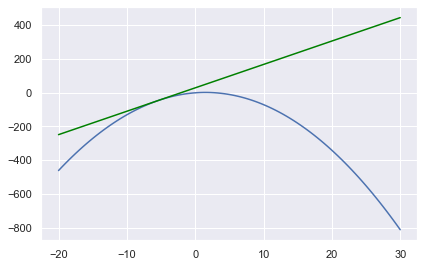

In [19]:
draw_secant([-5.4, -5.45])

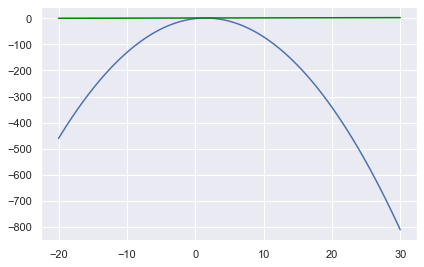

In [20]:
draw_secant([1.45, 1.5])

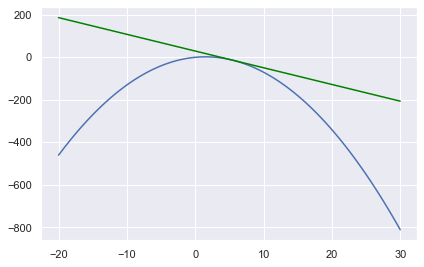

In [21]:
draw_secant([5.4, 5.45])

By plotting the slopes at many different x values, we can tell that they follow a straight line. This line can be described as its own function, and is known as the derivative. **A function's derivative can tell us the slope of the tangent line for any x value along the function**. To find the general function that describes the slope at any point, we need to solve the limit using the original variable instead of replacing with a specific x value. We can write the slope equation to the more common form. Instead of using x1 and x2 in the slope equation, we will use x and x+h.
$$\lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

In this form, h represents the distance between the 2 points: x and x+h. The slope is the value the limit approaches as h approaches 0.

### Differentiation
The process of finding a function's derivative is known as differentiation. Instead of selecting a specific x value, we'll leave x where it is and expand the equation to solve for the derivative. 

$f(x) = -(x)^2 + 3x - 1$
$\lim_{h \to 0} \frac{(-(x + h)^2 + 3(x + h) - 1) - (-(x)^2 + 3x - 1)}{h}$
$\lim_{h \to 0} \frac{-x^2 - 2xh - h^2 +3x + 3h - 1 + x^2 - 3x + 1}{h}$
$\lim_{h \to 0} \frac{-2xh - h^2 + 3h}{h}$
$\lim_{h \to 0} \frac{h(-2x - h + 3)}{h}$
$\lim_{h \to 0} -2x - h + 3$


**Exercise**

- Simplify the equation by using direct substitution to solve the limit.
- Use numpy.linspace() to generate 110 values from -5 to 6 and assign to x.
- Transform x using the equation solved above and assign to y.
- Generate a line plot using x and y.

This will be the straight line representing slope values for x as $\lim_{h \to 0}$

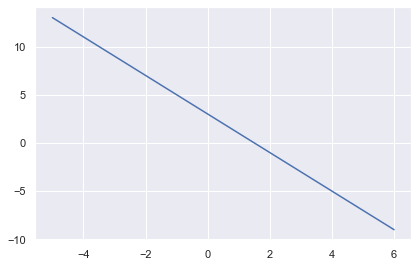

In [24]:
# Using substitution, above slope equation becomes
x = np.linspace(-5, 6, 110)
y = -2*x + 3

plt.plot(x, y)

### Critical Points
We use the following notation to specify that −2x+3 is our curve's derivative:
$$y' = -2x + 3$$

The following is an alternative form of notation, which makes it clear that the derivative of y is a function of x:
$$f'(x) = -2x + 3$$

The last common notation is the following, which can be read as "the derivative with respect to x is"
$$\frac{d}{dx}[ -x^2 + 3x - 1 ] =  -2x + 3$$

Earlier we discussed how the slope at x=1.5 was 0 and acted as a transition point from positive slope to negative slope. This is formally known as a **critical point**. **At a function's critical point**, the slope is either 0 or undefined. Not all critical points act as transition points.

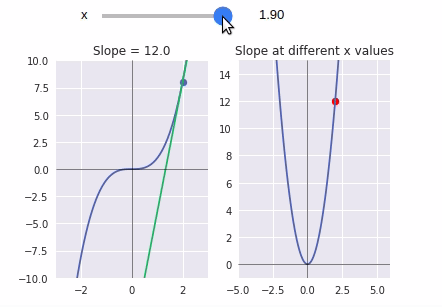

### Extreme Values

Above, we observed how the slope didn't change from positive to negative at the critical point. Critical points are interesting to us in data science when they represent extreme values. Extreme values can be split into 2 categories -- minimum and maximum. As we noticed earlier, a critical point can be a minimum value if the slope transitions from negative to positive at that point. When the slope transitions from positive to negative at a point, it can be a maximum value. If the slope doesn't transition at a critical point, like at x=0 for y=x3 in the last screen, then it can't be a minimum or a maximum point.

A curve can have multiple critical points and multiple candidates for minimum and maximum values. The following curve has 3 critical points and all 3 meet the criteria of transitioning slope from positive to negative or negative to positive. At the same time, none of the values are the highest points on the curve (while one of them seems to be the lowest).

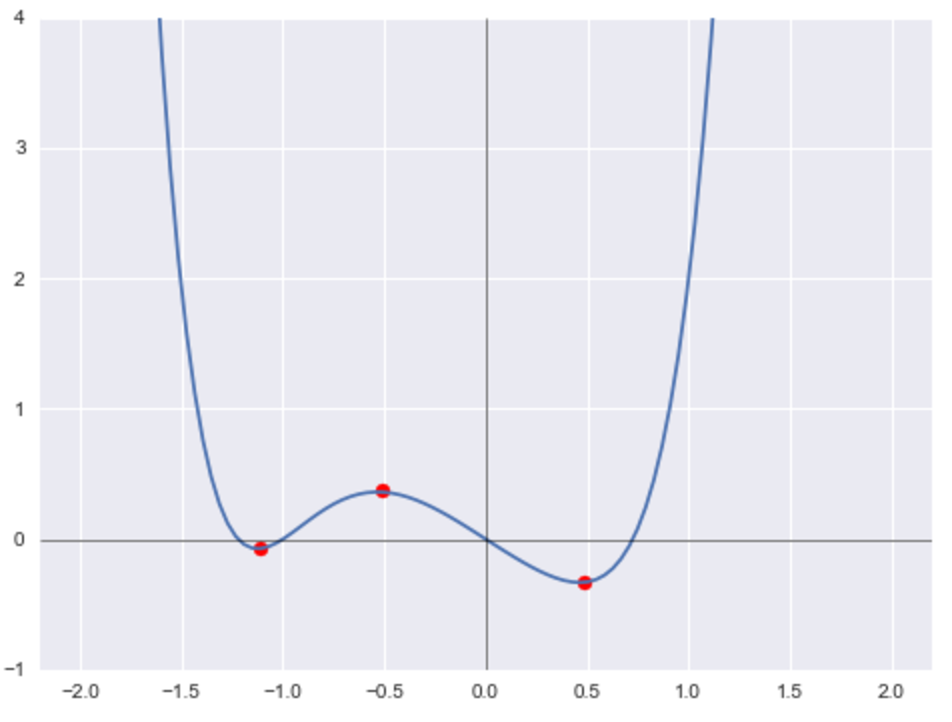

These values are known as local extrema, since they're the lowest or highest value in the interval surrounding each point. If a critical point is the lowest point in the interval surrounding it, it's known as a relative minimum. If it's the highest point in the neighborhood, it's known as a relative maximum.

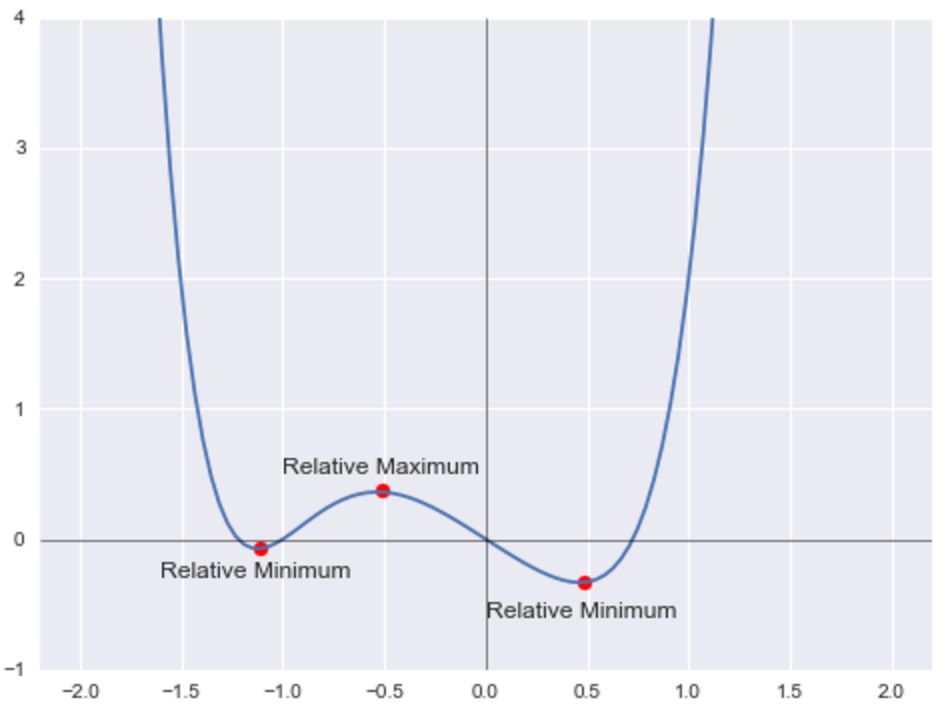



Since we know that relative minimums and maximums can occur when the slope is 0, we can solve for the critical points using arithmetic (instead of relying on just the graph). To calculate the critical point for our original curve, we need to set our derivative function to 0 and solve for x.

$$-2x + 3 = 0$$
$x = 1.5$

This matches the value we observed visually in the graphs we generated above. Since this curve only had 1 critical point and the slope transitioned from positive to negative (as x is increased), we can safely say that this is a relative maximum.

### Power Rule for Derivatives
We calculated the derivative for our curve using a limit and working out the arithmetic. We then set the derivative function to 0 and calculated the critical points. This approach can be painful to do for more complex functions like $y = x^5 - x$ because we'll need to replace x with x+h and expand the exponent (x+h)5:

$$f'(x) = \lim_{h \to 0} \frac{((x + h)^5 - (x + h)) - (x^5 - x) }{h}$$

We can instead apply derivative rules to more easily calculate the derivative function. 

The first rule is the power rule, which helps us take the derivative for functions with exponents.

$$f'(x) = r x^{r-1}$$

If our original function were $f(x) = x^2$ r would be 2, Its derivative would be $f'(x) = 2x^{2-1}$ or $f'(x) = 2x$ for short.

When we calculate the derivative of a function, we're really computing and solving a limit. We can use the properties of limits to break down the function into 3 different derivatives. We can then apply the power rule to each component:

The function for our curve above is $f(x) = -(x)^2 + 3x - 1$ and $f'(x) = -2x + 3$


**Exercise**

- Calculate the derivative of `f(x)=x**5` using pencil and paper. Use the derivative function to look up the slope at x=2 and assign to `slope_one`.
- Calculate the derivative of `f(x)=x**9` using pencil and paper. Use the derivative function to look up the slope at x=0 and assign to `slope_two`.


In [2]:
x = 2
slope_one = 5*(x**4)
slope_one

80

In [6]:
x = 0
slope_two = 9*(x**8)
slope_two

0

### Linearity of Differentiation

Another important set of rules is linearity of differentiation. Like with limit functions, we can separate mathematical terms that are being added or subtracted and differentiate them separately. Linearity of differentiation consists of 2 rules. First is the sum rule:

$$\frac {d}{dx} [f(x) + g(x)] = \frac {d}{dx} [f(x)] + \frac {d}{dx} [g(x)]$$

Second is the constant factor rule, which lets us pull out constants from the derivative:

$$\frac {d}{dx} [cf(x)] = c\frac {d}{dx} [f(x)]$$

By combining both of these rules, we can find the derivative for a wide range of functions. For example:

$$\frac {d}{dx} [-x^3 + x^2 ] =  \frac {d}{dx} [-x^3] + \frac {d}{dx} [x^2] = -3x^2 + 2x$$

**Exercise**

- Calculate the derivative of `f(x)=x**5−x` using pencil and paper. Use the derivative function to look up the slope at `x=1` and assign to `slope_three`.
- Calculate the derivative of `f(x)=x**3−x**2` using pencil and paper. Use the derivative function to look up the slope at `x=2` and assign to `slope_four`.

In [7]:
x = 1
x_1 = 2

slope_three = 5*(x**4) - x
slope_four = 3*(x_1**2) - 2*x_1

print(slope_three, slope_four)

4 8


### Finding Extreme Values
Earlier, we started by plotting the curve and visually observing where the critical points could be. We can aslo do so by finding the derivatives and setting them to 0. 

In the following function:
$$f(x) = x^3 - x^2$$

the derivative is:

$$f'(x) = 3x^2 - 2x$$

We have to set the derivative to zero and find relative minimum and relative maximum by analyzing the slope around the point(s) to see if slope transitions from positive to negative or vice versa (when x is increased). We can use a [sign chart](http://www.rasmus.is/uk/t/F/Su53k02.htm) for this. 



In [8]:
derivative = "3x^2 - 2x"
critical_points = [0, 2/3]
rel_min = [2/3]
rel_max = [0]